## American House Prices: A Data Science Analysis ##

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Disply all columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
data = pd.read_csv('drive/MyDrive/American_Housing_Data_20231209.csv.zip')

## Data Info

In [48]:
data

Zip Code      Price  Beds  Baths  Living Space                 Address  \
0         10013  3999000.0     2      3          1967       74 GRAND ST APT 3   
1         10013  3999000.0     2      3          1967       74 GRAND ST APT 3   
2         10014  1650000.0     1      1           718   140 CHARLES ST APT 4D   
3         10014   760000.0     3      2          1538             38 JONES ST   
4         10014  1100000.0     1      1           600    81 BEDFORD ST APT 3F   
...         ...        ...   ...    ...           ...                     ...   
39976     98199  2495000.0     4      4          3380         2626 27TH AVE W   
39977     98199  2295000.0     4      4          2878         3215 32ND AVE W   
39978     98199   950000.0     3      2          1380         3257 22ND AVE W   
39979     98199   425000.0     2      1           856  3711 26TH PL W APT 102   
39980     98199  1150000.0     3      3          2840         2911 25TH AVE W   

           City       State  Zip Code Population  Zip Code Density    County  \
0      New York    New York                29563           20967.9  New York   
1      New York    New York                29563           20967.9  New York   
2      New York    New York                29815           23740.9  New York   
3      New York    New York                29815           23740.9  New York   
4      New York    New York                29815           23740.9  New York   
...         ...         ...                  ...               ...       ...   
39976   Seattle  Washington                22890            2086.8      King   
39977   Seattle  Washington                22890            2086.8      King   
39978   Seattle  Washington                22890            2086.8      King   
39979   Seattle  Washington                22890            2086.8      King   
39980   Seattle  Washington                22890            2086.8      King   

       Median Household Income  Latitude  Longitude  
0                     370046.0  40.72001  -74.00472  
1                     370046.0  40.72001  -74.00472  
2                     249880.0  40.73407  -74.00601  
3                     249880.0  40.73407  -74.00601  
4                     249880.0  40.73407  -74.00601  
...                        ...       ...        ...  
39976                 205611.0  47.65139 -122.40223  
39977                 205611.0  47.65139 -122.40223  
39978                 205611.0  47.65139 -122.40223  
39979                 205611.0  47.65139 -122.40223  
39980                 205611.0  47.65139 -122.40223  

[39981 rows x 14 columns]

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

## Statistical Summary

In [50]:
data.describe().T

count           mean            std          min  \
Zip Code                 39981.0   64833.391336   25614.601116  10013.00000   
Price                    39981.0  622777.118481  946979.305294   1800.00000   
Beds                     39981.0       3.171682       1.308796      1.00000   
Baths                    39981.0       2.466572       1.323042      1.00000   
Living Space             39981.0    1901.522723    1211.307257      2.00000   
Zip Code Population      39981.0   37726.201996   18672.647445      0.00000   
Zip Code Density         39981.0    2379.412483    2946.574792      0.00000   
Median Household Income  39979.0  110837.259861   47309.055715  27475.00000   
Latitude                 39981.0      36.435668       4.446862     25.72983   
Longitude                39981.0     -98.080576      15.061145   -122.82687   

                                  25%           50%           75%  \
Zip Code                  40215.00000   74136.00000   85730.00000   
Price                    265000.00000  399900.00000  674990.00000   
Beds                          3.00000       3.00000       4.00000   
Baths                         2.00000       2.00000       3.00000   
Living Space               1200.00000    1639.00000    2265.00000   
Zip Code Population       24465.00000   35049.00000   46816.00000   
Zip Code Density            902.40000    1588.70000    2736.80000   
Median Household Income   76640.00000  100405.00000  135075.00000   
Latitude                     33.23985      36.16662      39.28309   
Longitude                  -111.63631     -96.83968     -85.65698   

                                  max  
Zip Code                 9.819900e+04  
Price                    3.800000e+07  
Beds                     5.400000e+01  
Baths                    6.600000e+01  
Living Space             7.434000e+04  
Zip Code Population      1.164690e+05  
Zip Code Density         5.828960e+04  
Median Household Income  9.002030e+05  
Latitude                 4.774237e+01  
Longitude               -7.370451e+01

For the Price are; μ = 622,777.12, and, σ = 946,979.31, which is a wide range for house prices. Min: 1,800. Max: 38,000,000.00.

## Missing Values

In [51]:
data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

In [52]:
data[data['Median Household Income'].isnull()]

Zip Code     Price  Beds  Baths  Living Space          Address  \
27785     80939  460000.0     3      3          1444     3124 LOOT DR   
27786     80939  565000.0     6      4          3064  2418 TEMPEST DR   

                   City     State  Zip Code Population  Zip Code Density  \
27785  Colorado Springs  Colorado                    0               0.0   
27786  Colorado Springs  Colorado                    0               0.0   

        County  Median Household Income  Latitude  Longitude  
27785  El Paso                      NaN  38.87772 -104.67742  
27786  El Paso                      NaN  38.87772 -104.67742

Should I impute the missing values for Median Household Income with the average of $110,837.26, or should I drop the two rows with missing data? I think dropping the two rows might be better since imputing with the average could skew the data slightly.

In [53]:
data.dropna(subset=['Median Household Income'], inplace=True)

In [54]:
data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39979 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39979 non-null  int64  
 1   Price                    39979 non-null  float64
 2   Beds                     39979 non-null  int64  
 3   Baths                    39979 non-null  int64  
 4   Living Space             39979 non-null  int64  
 5   Address                  39979 non-null  object 
 6   City                     39979 non-null  object 
 7   State                    39979 non-null  object 
 8   Zip Code Population      39979 non-null  int64  
 9   Zip Code Density         39979 non-null  float64
 10  County                   39979 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39979 non-null  float64
 13  Longitude                39979 non-null  float64
dtypes: float64(5), int64(5), ob

##Insights:

No missing values.

Because zip code, city, and state, already have spatial information for addresses, It's redundant information. Also, could be problematic for a model without noise or overfitting (high cardinality issues). Removing Address reduces dimensionality and addresses are hard to interpret the context of predictions. So, will drop "Address".

In [56]:
data = data.drop('Address', axis=1)

In [57]:
data.nunique()

Zip Code                   1732
Price                      5196
Beds                         31
Baths                        28
Living Space               4623
City                        243
State                        29
Zip Code Population        1711
Zip Code Density           1705
County                       88
Median Household Income    1722
Latitude                   1732
Longitude                  1732
dtype: int64

## Visualize

In [58]:
features_cat = ['City', 'State', 'County']

for cat in features_cat:
  print(data[cat].value_counts())
  print('-' * 50)

City
Mesa              894
Charlotte         894
Las Vegas         892
Denver            888
Virginia Beach    883
                 ... 
Poteet              1
Boerne              1
Huffman             1
Far Rockaway        1
Shepherdsville      1
Name: count, Length: 243, dtype: int64
--------------------------------------------------
State
California              6056
Texas                   5894
Arizona                 2640
North Carolina          1777
Colorado                1772
Tennessee               1701
Oklahoma                1692
Florida                 1618
Kansas                   929
Nevada                   895
Kentucky                 885
Virginia                 885
New Mexico               883
Nebraska                 870
Indiana                  866
Washington               860
Oregon                   853
District of Columbia     848
Ohio                     832
Minnesota                807
Louisiana                804
Michigan                 791
Pennsylvania       

In [59]:
def hist_box(data, feature, figsize=(14,6), kde = True):
  """
  Histograns and Boxplots side by side for numeric features.
  Data: DataFrame
  Feature: Numeric Feature
  figzize: Size of the figure
  kde: Kernel Density Estimation
  """

  f2, (ax_box2, ax_hist2) = plt.subplots(
      # Number of rows of the subplot grid = 2
      nrows = 2,

      # x-axis will be shared amound all subplots.
      sharex = True,

      # Make the boxplot take up double space
      gridspec_kw = {"height_ratios": (0.25, 0.75)},

      # Figure size
      figsize = figsize
  )

  # Add a boxplot for the give feature
  sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = 'lightblue')
  sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2)
  ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = '--')
  ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = '-')

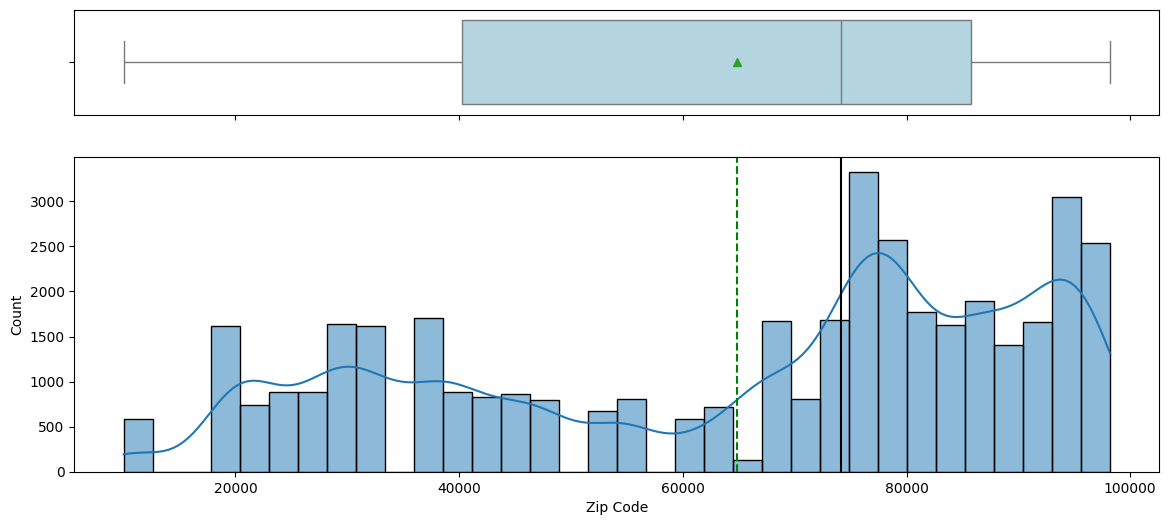

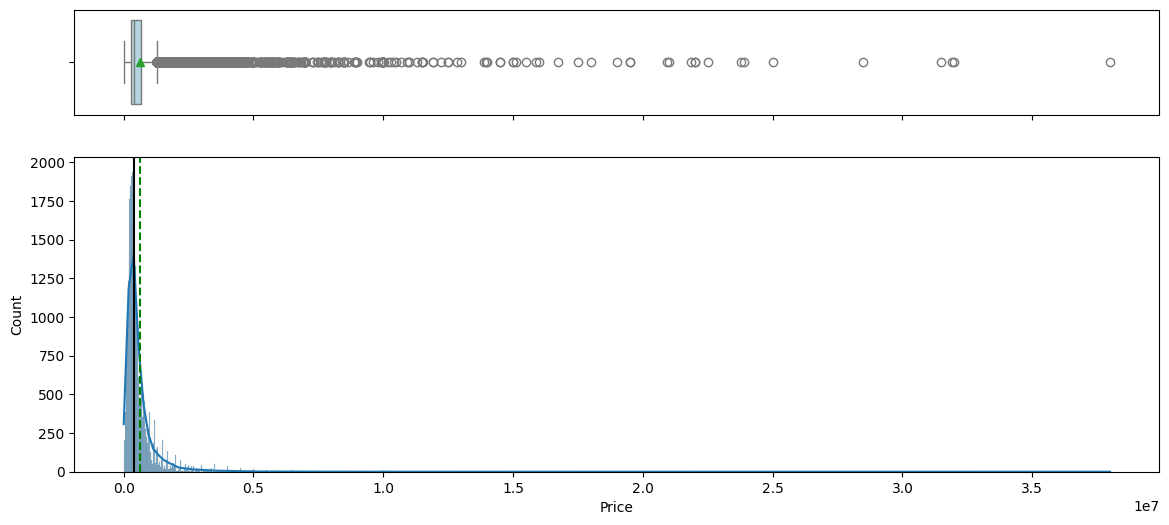

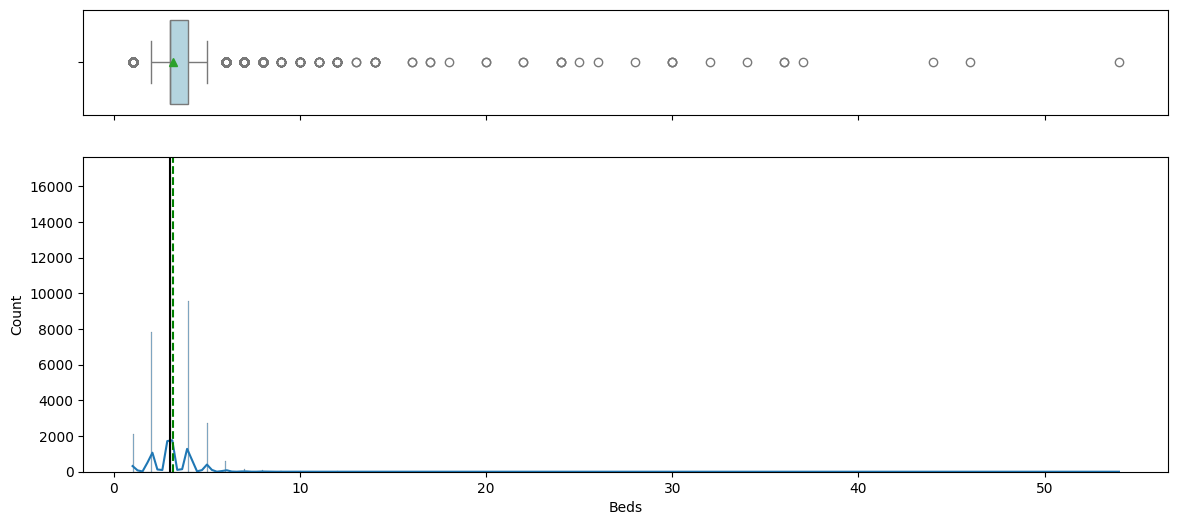

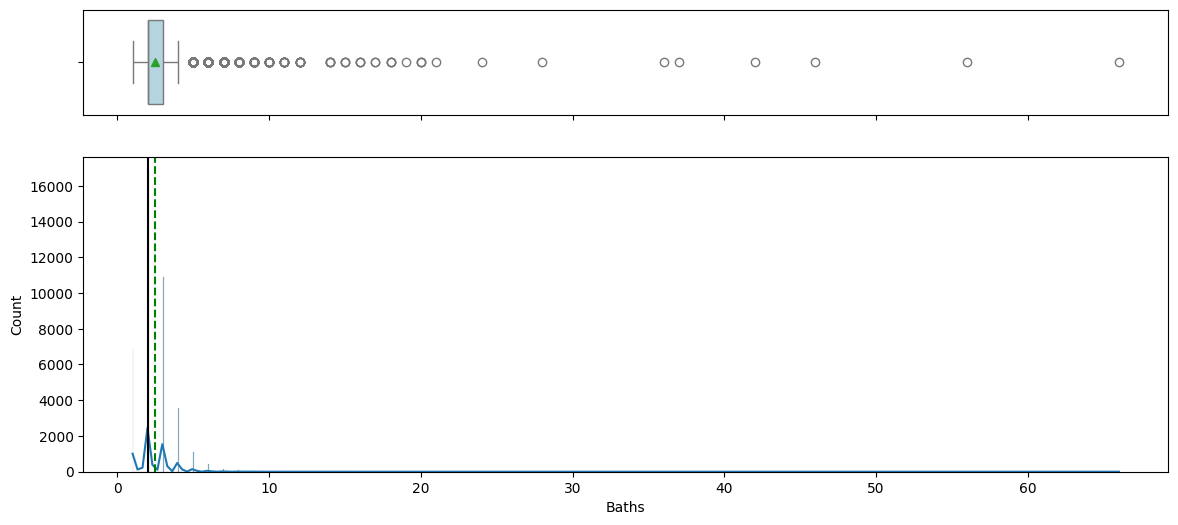

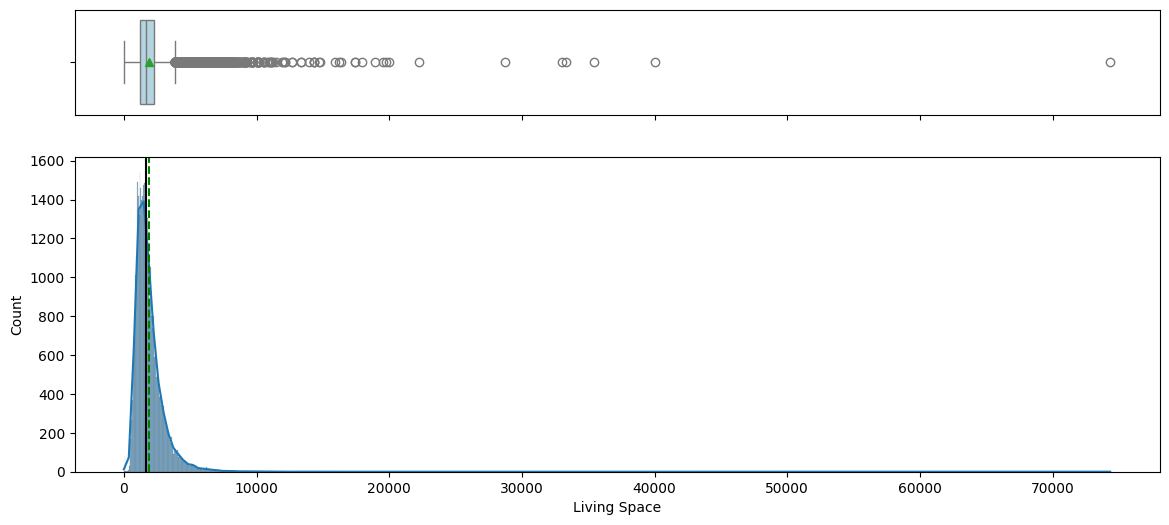

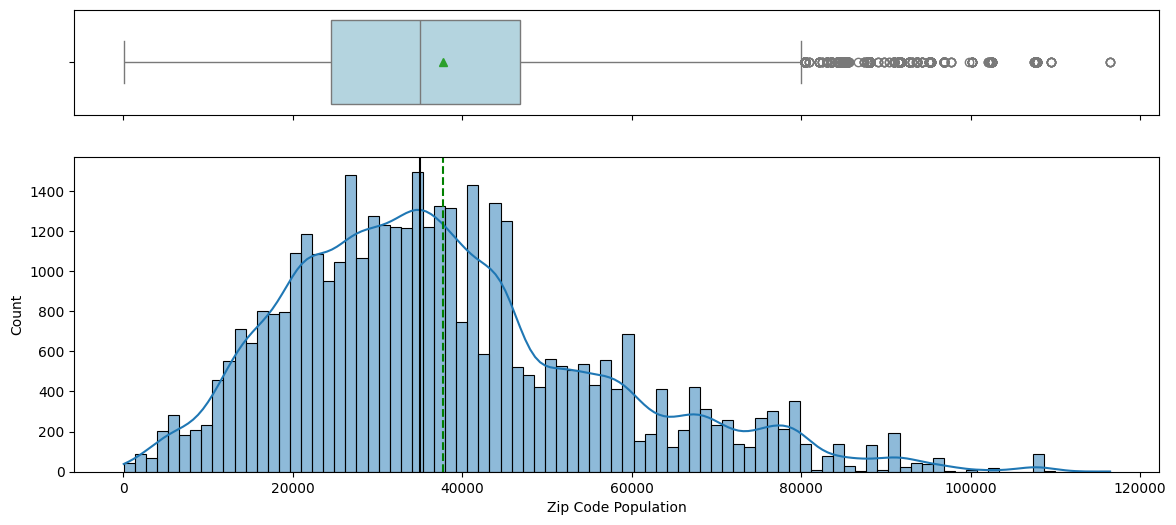

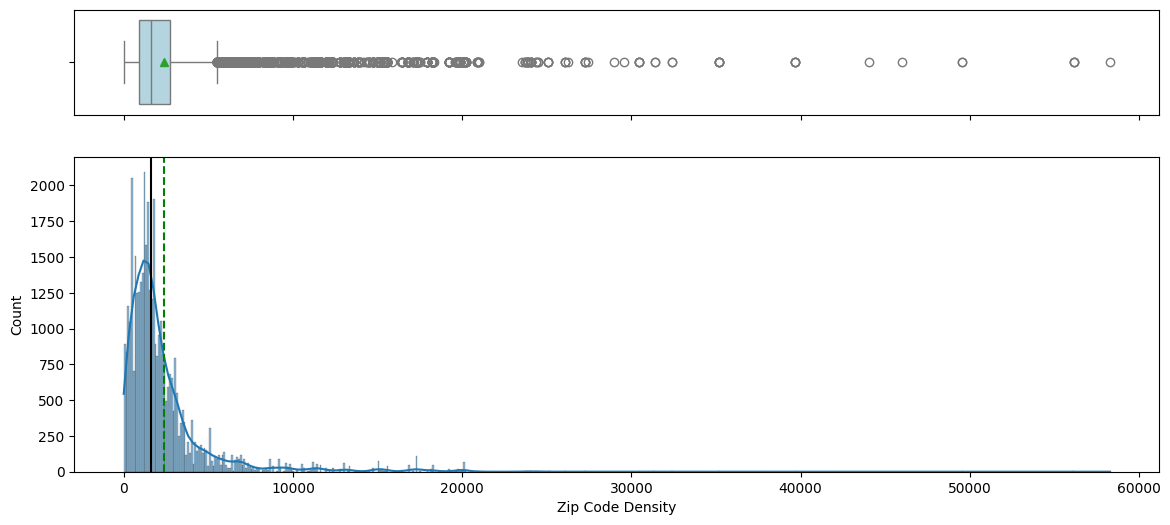

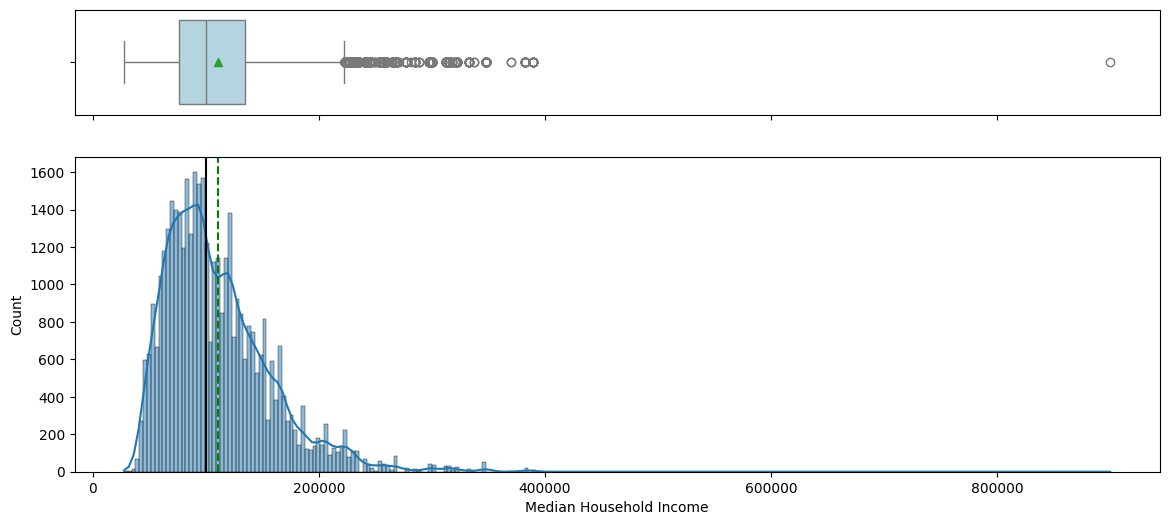

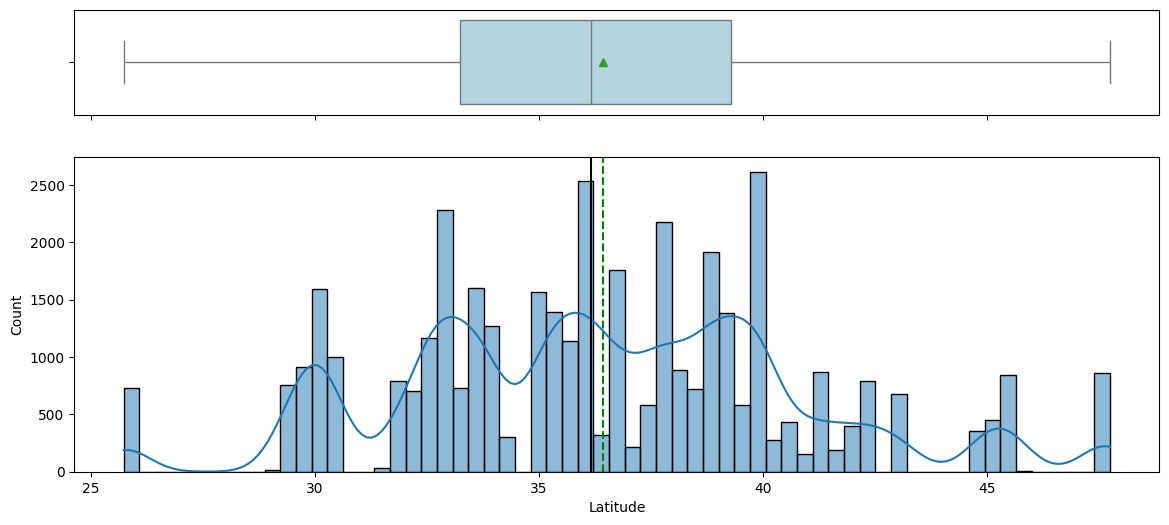

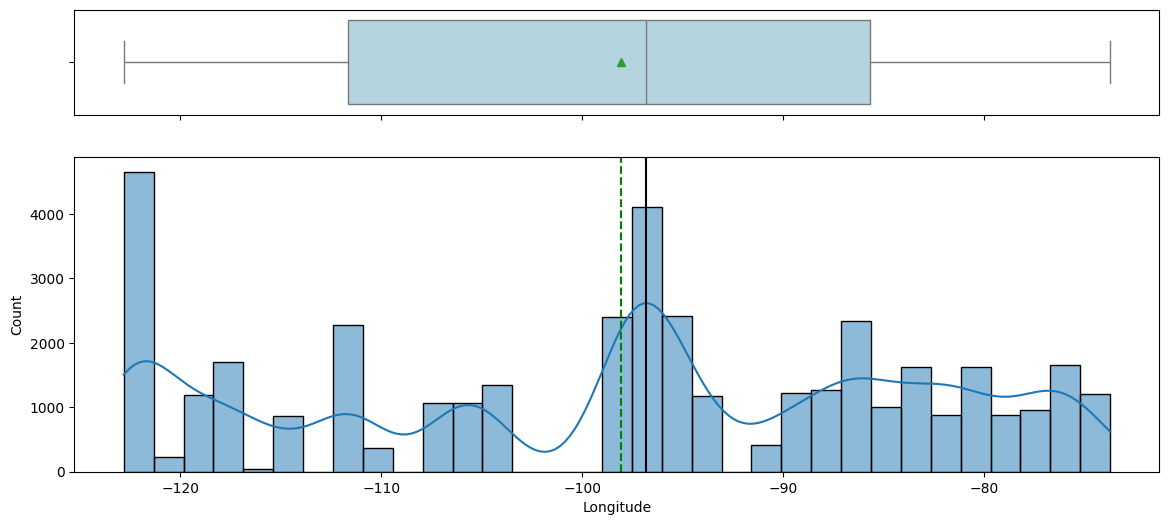

In [60]:
# Features of integer and float (10 columns)
features_int = ['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density',
       'Median Household Income', 'Latitude', 'Longitude']

# Call the features of hist_box
for feature in features_int:
  hist_box(data, feature)

## Zip Code, Zip Code Population, and Zip Code Density

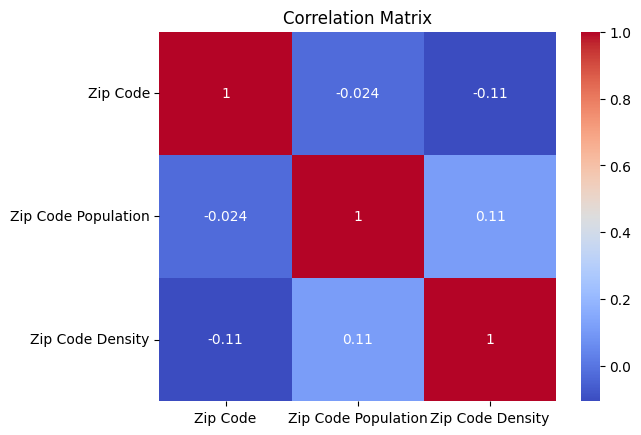

In [61]:
zip_code_data = data[['Zip Code', 'Zip Code Population', 'Zip Code Density']]
correlation_matrix = zip_code_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

All three zip codes does not have a strog correlation. I will keep them.

## Features Engineering

Median Household Income and Living Space are both right-skewed, so let's apply a log transformation to them and reducing the impact of outliers.

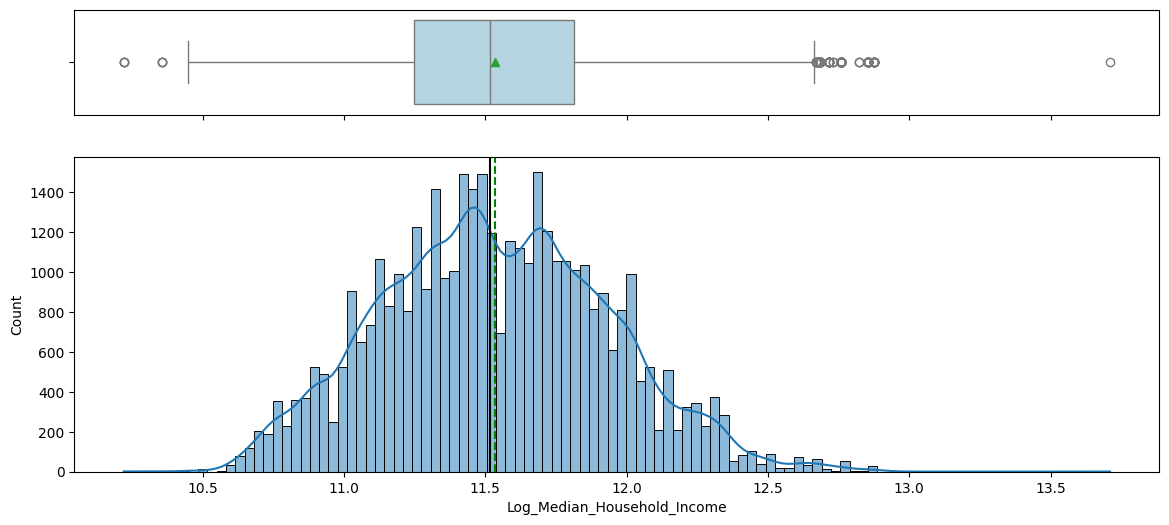

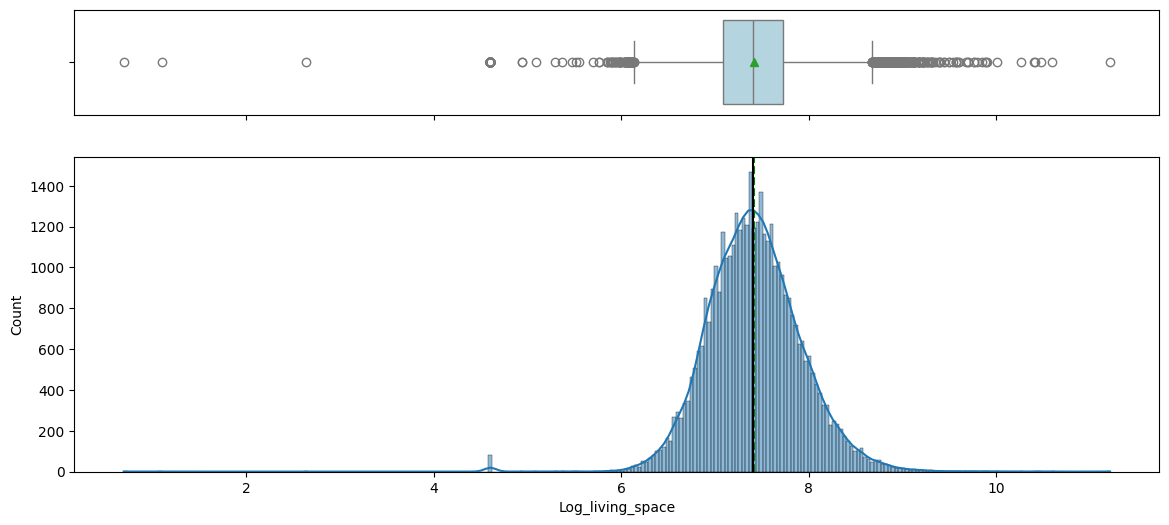

In [62]:
# Create a new feature with the log-transfored income
data['Log_Median_Household_Income'] = np.log(data['Median Household Income'])
data['Log_living_space'] = np.log(data['Living Space'])

# Features of integer and float (10 columns)
features_int = ['Log_Median_Household_Income', 'Log_living_space']

# Call the features of hist_box
for feature in features_int:
  hist_box(data, feature)

In [63]:
def hist(data, feature, figsize=(20,8)):
  """
  Histograms for categorical features.
  Data: DataFrame
  Feature: Categorical Feature
  figzize: Size of the figure
  """

  # Create a figure and axes with the specified figsize
  fig, ax = plt.subplots(figsize = figsize)

  # Get the values counts and sort them in descending order
  value_counts = data[feature].value_counts().sort_values(ascending = False)

  # Use sns.countplot insted of sns.histplot for categorical data
  # and order the bars according to the values counts
  sns.countplot(data = data, x = feature, ax=ax, order=value_counts.index)

  # Rotating 90 for features
  plt.xticks(rotation = 90)

  # Show the pot immediately after creating it for each feature
  plt.show()



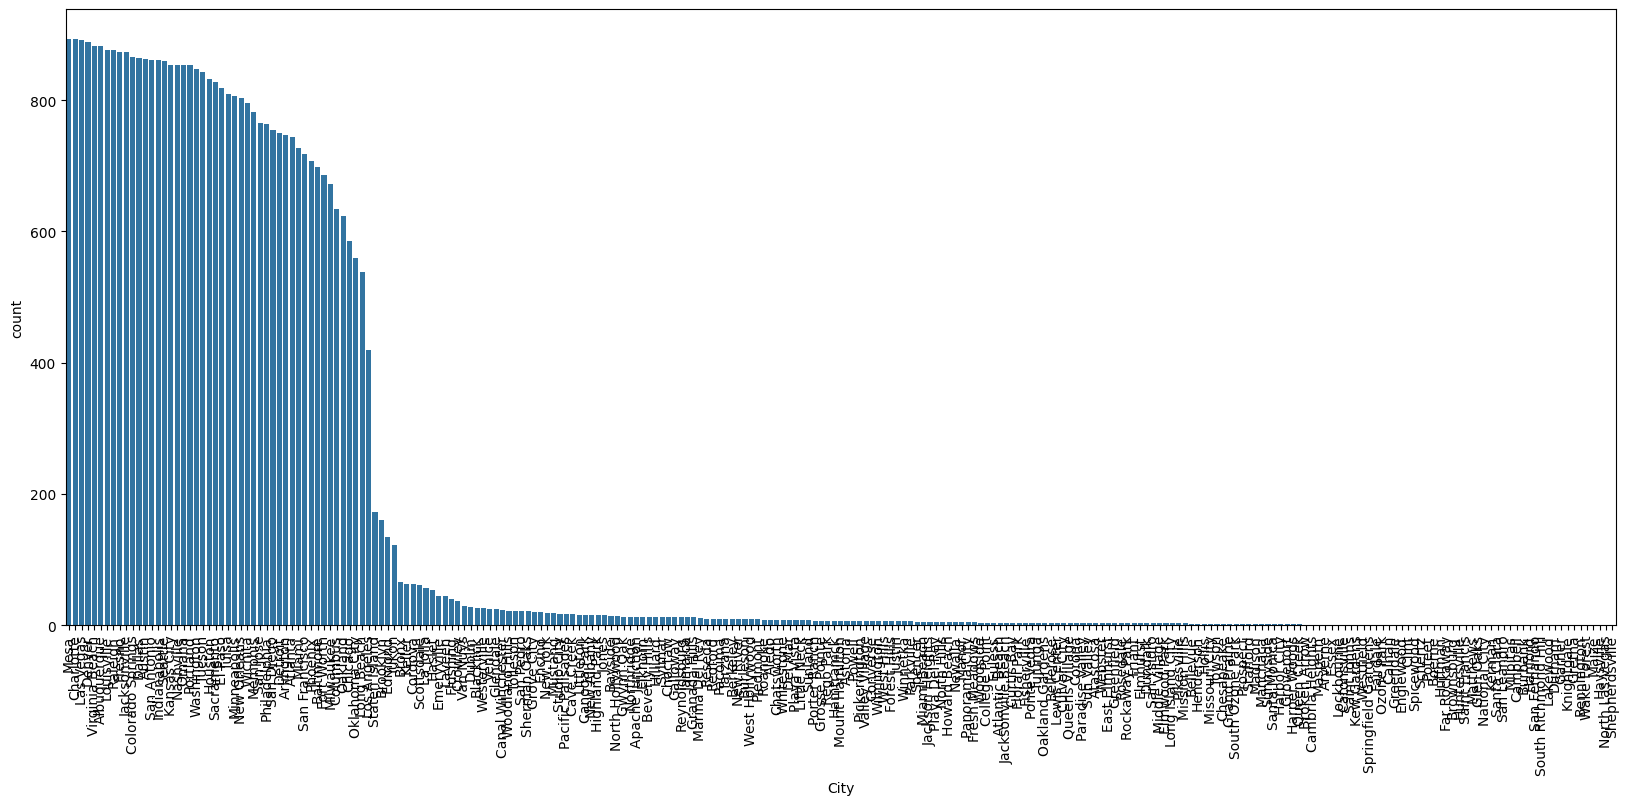

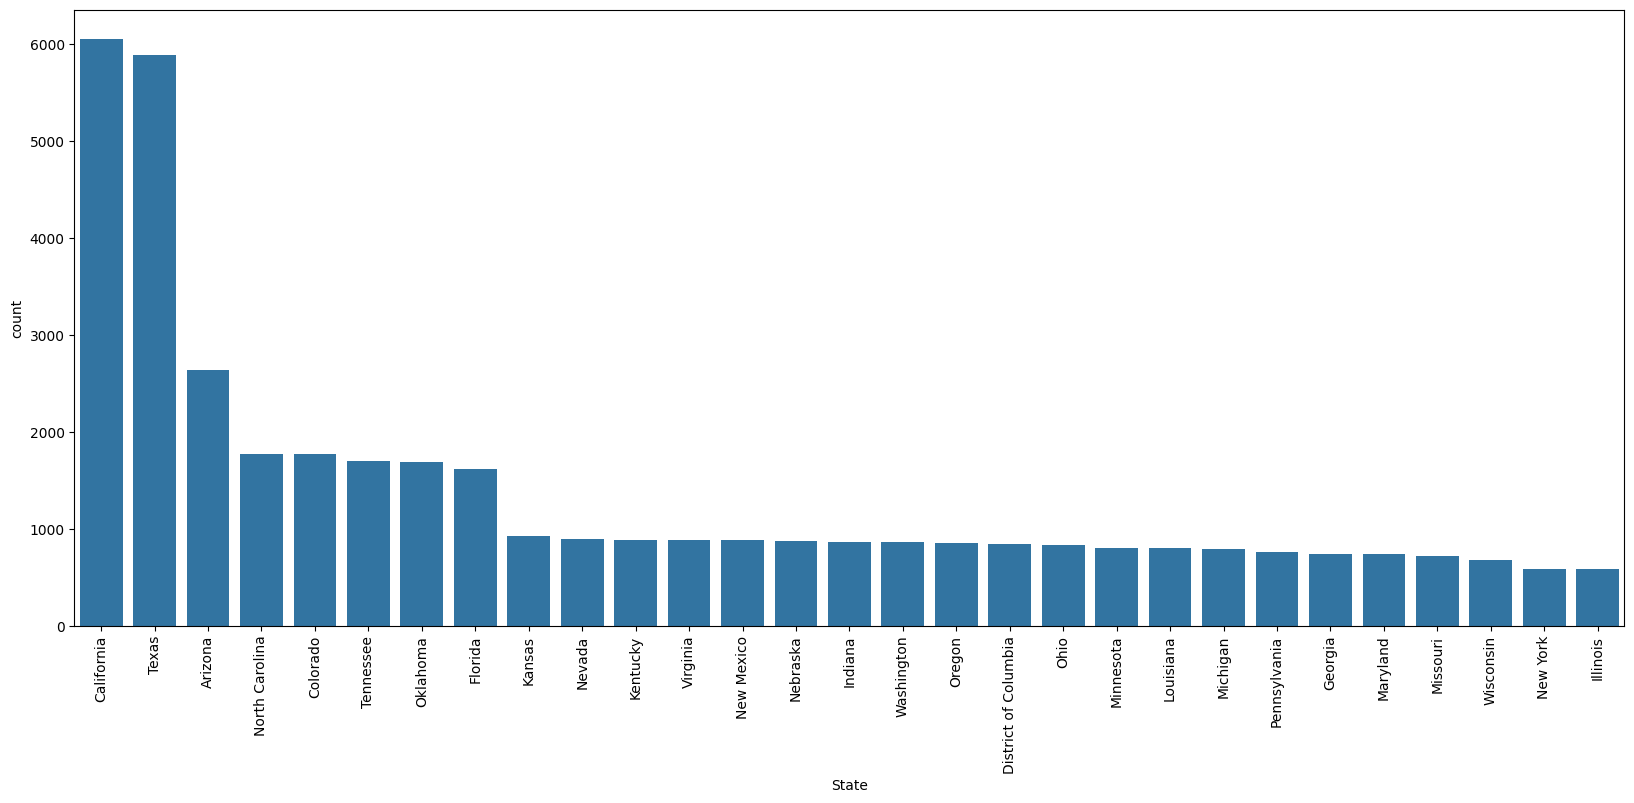

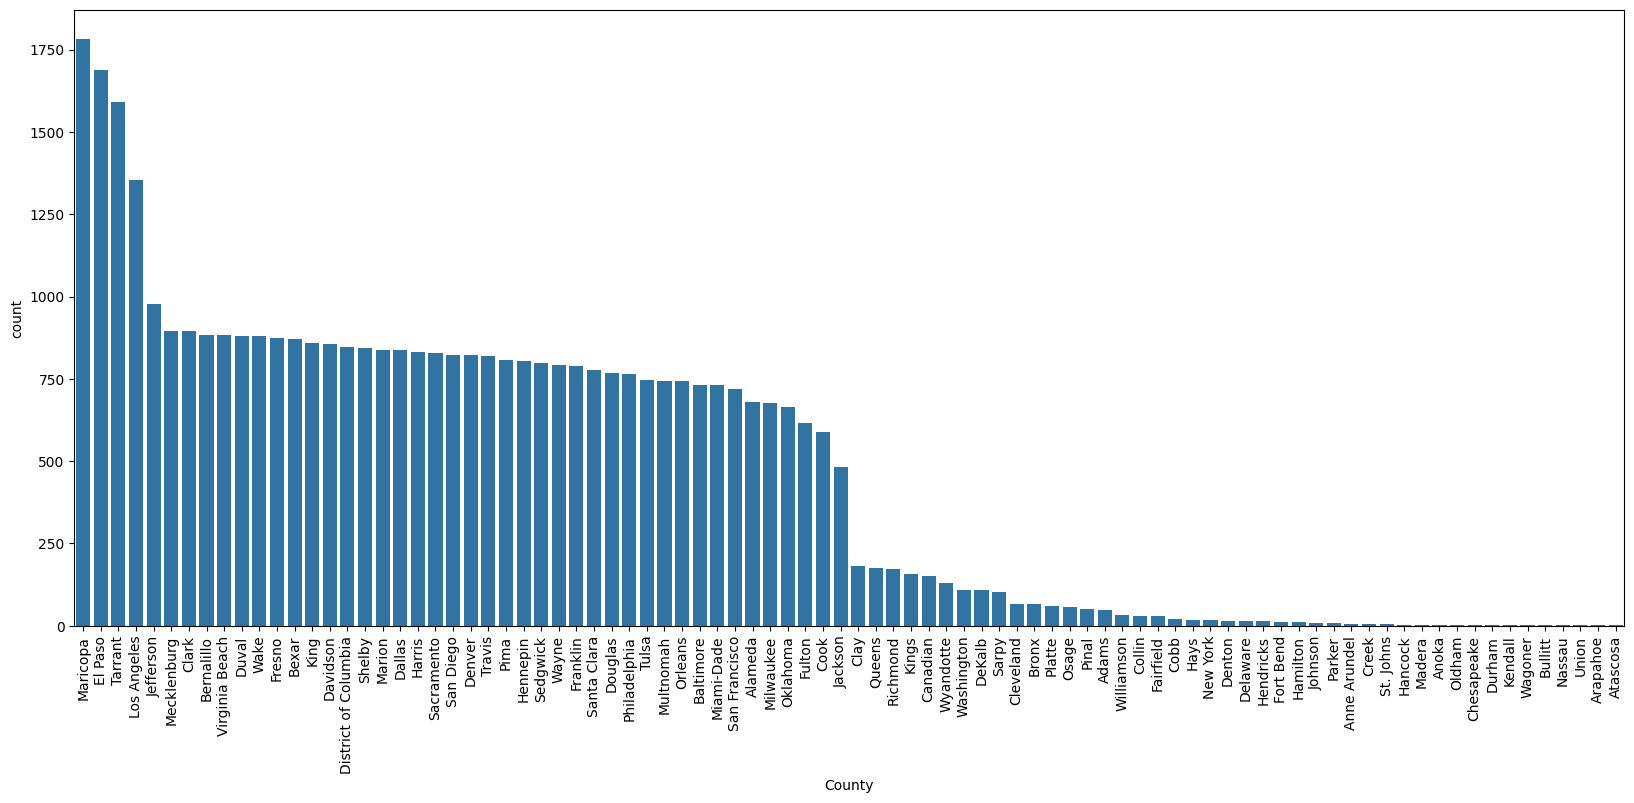

In [64]:
# Features for categories (3 columns)
features_cat = ['City', 'State', 'County']

# Call the features of hist
for feature in features_cat:
  hist(data, feature)
  plt.show()

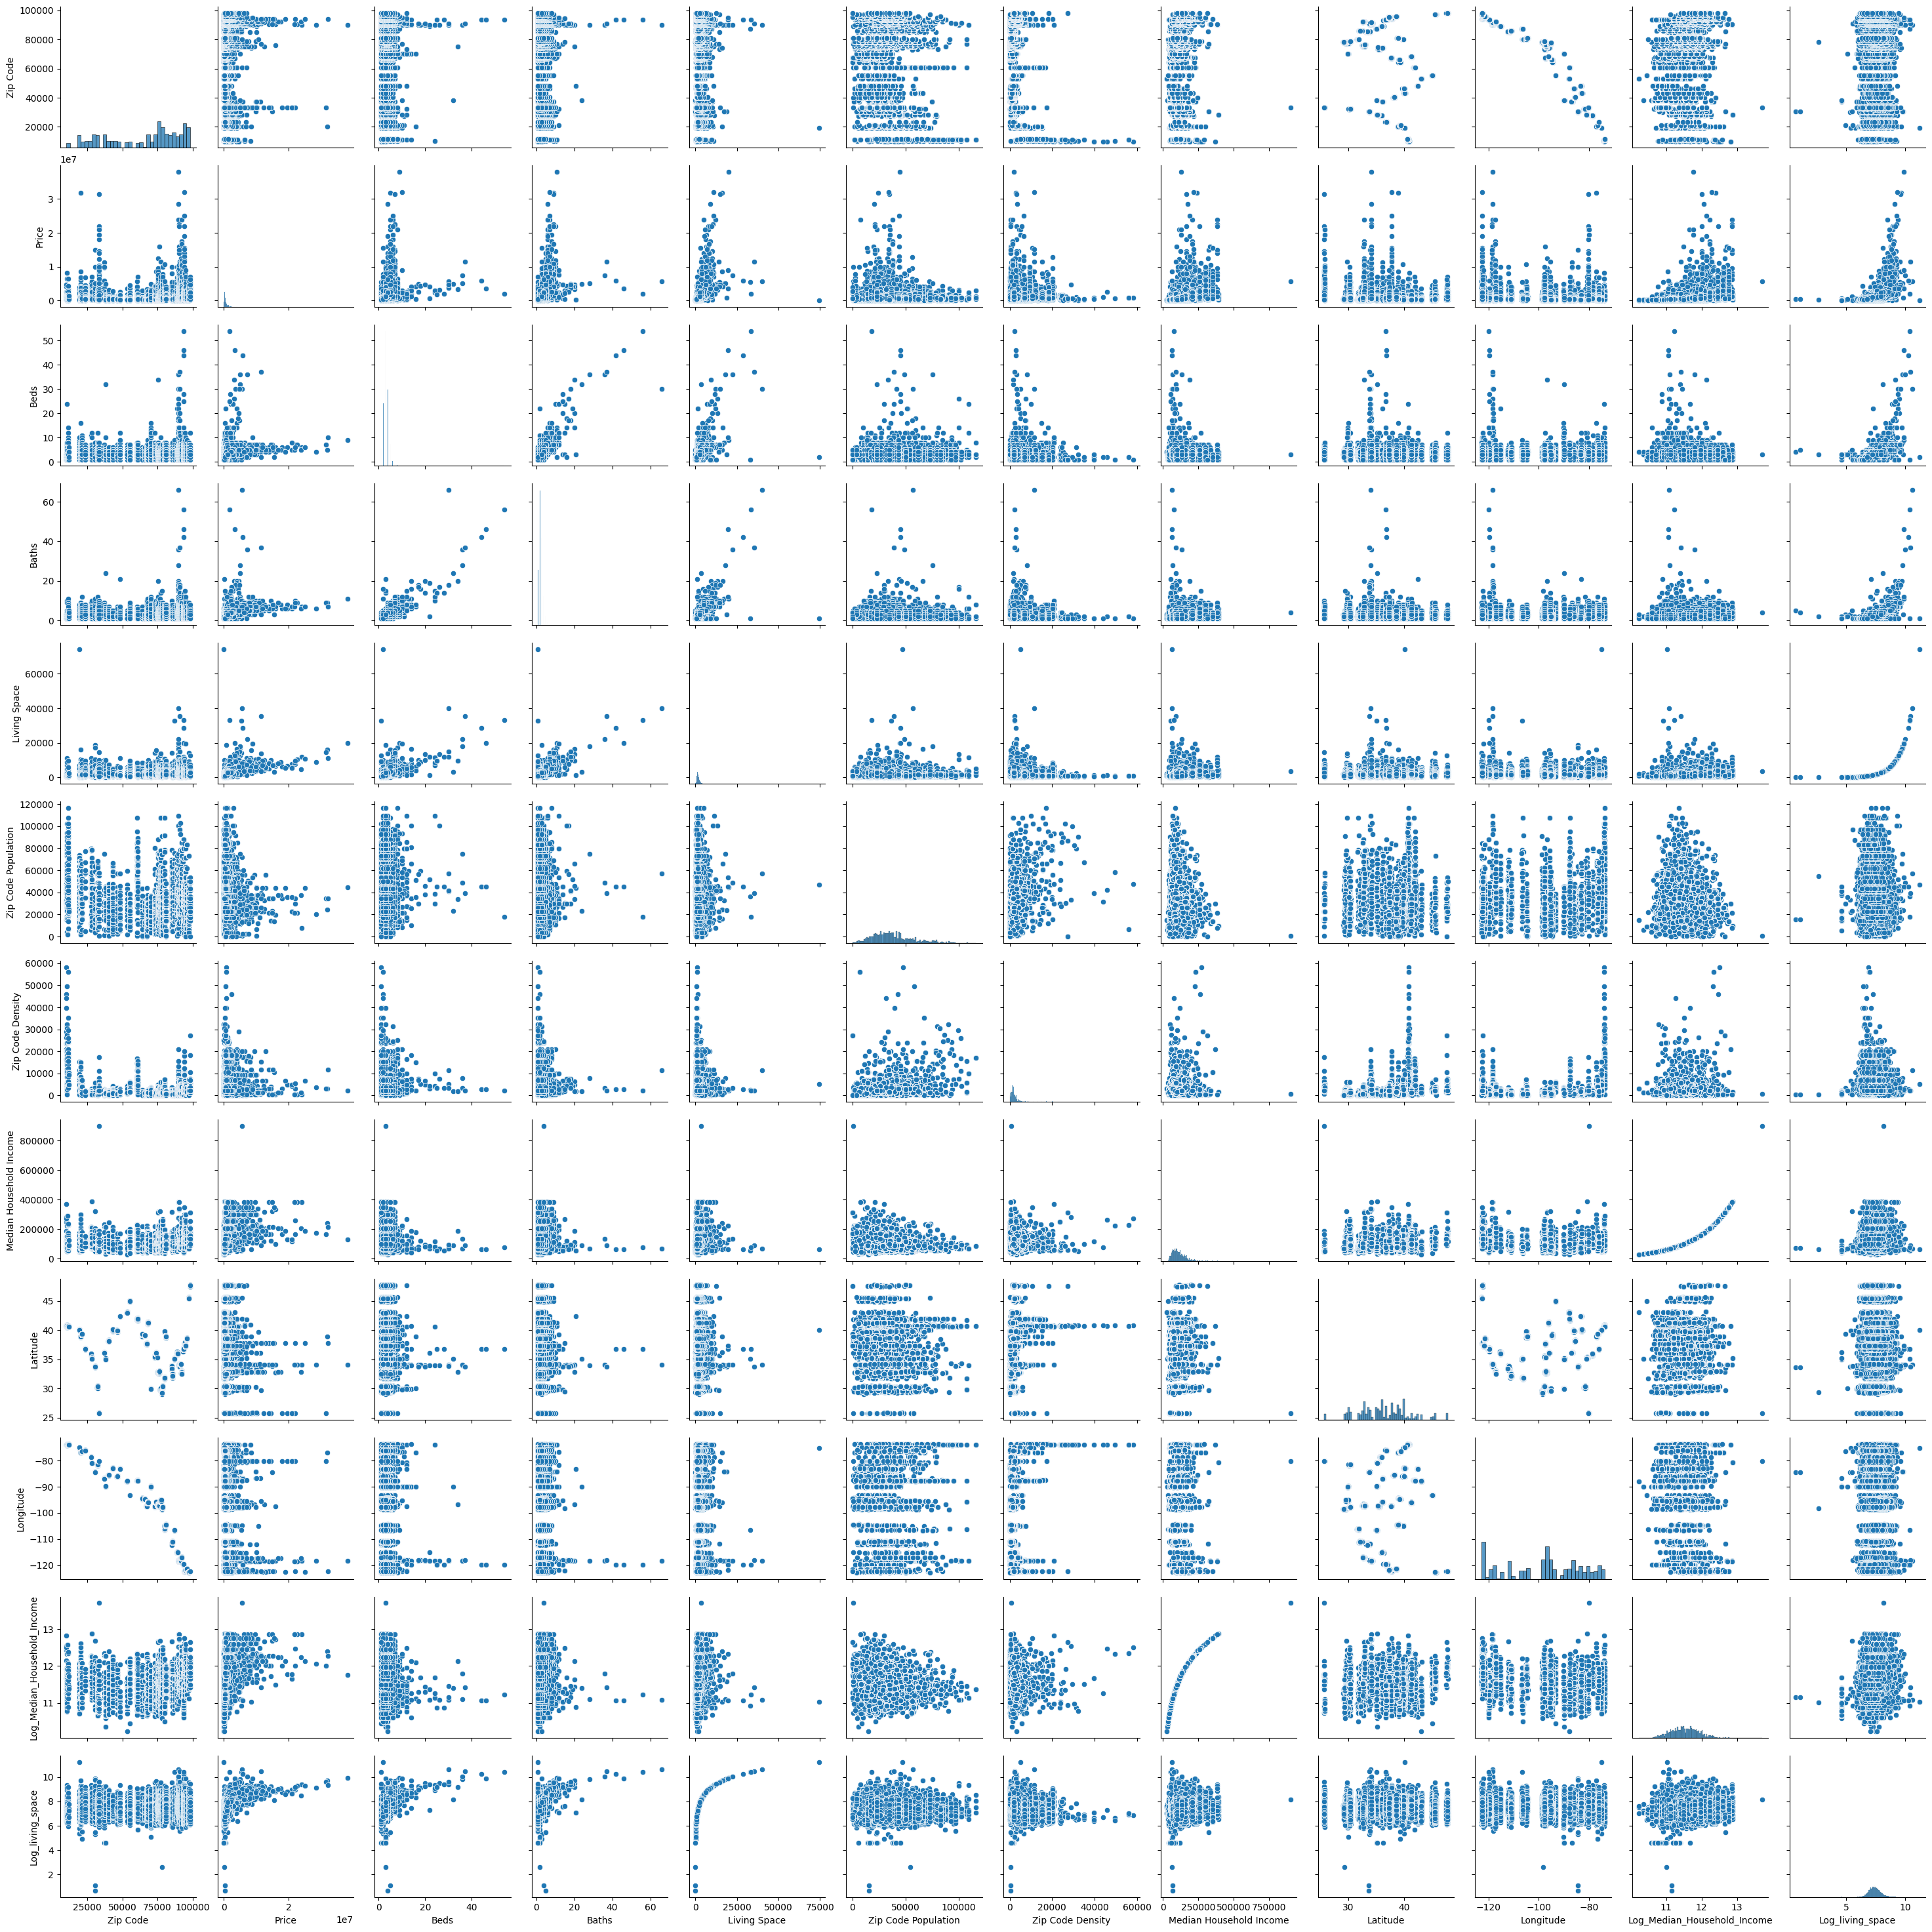

In [65]:
sns.pairplot(data)

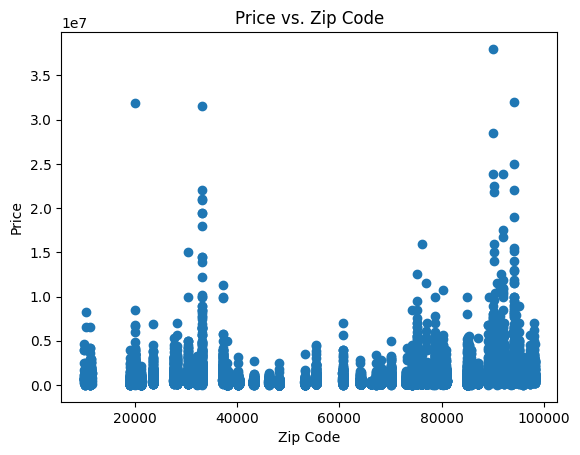

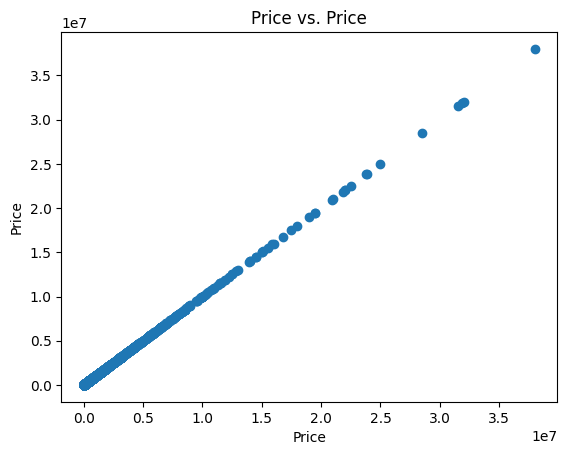

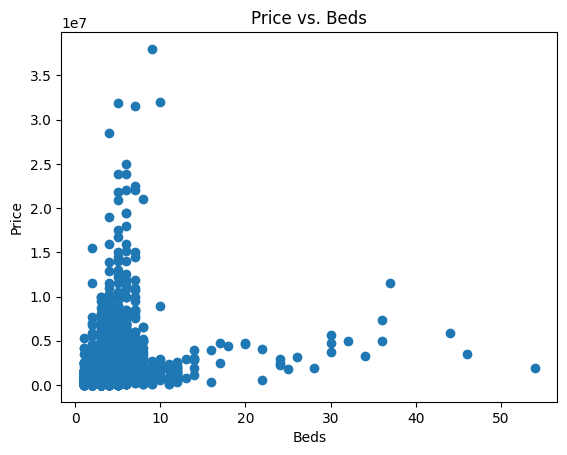

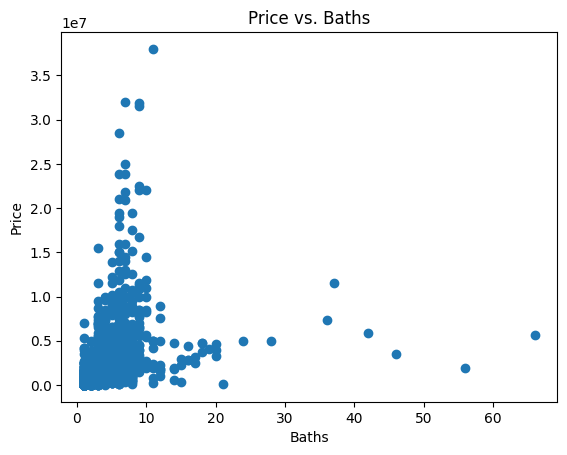

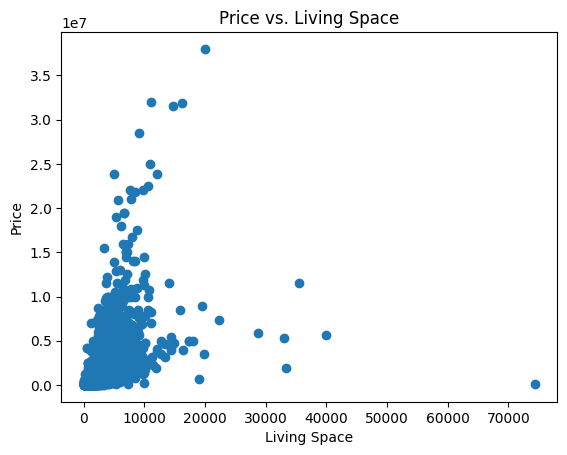

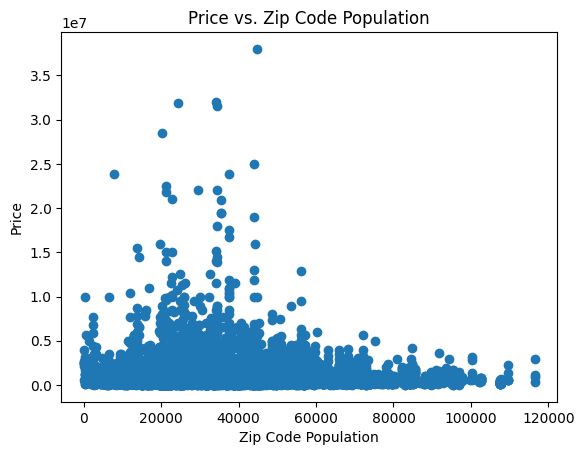

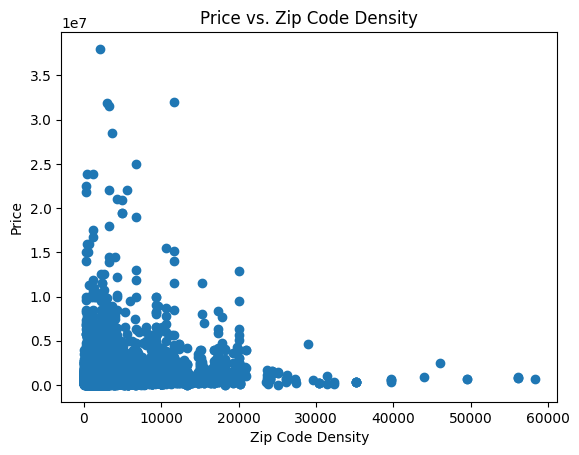

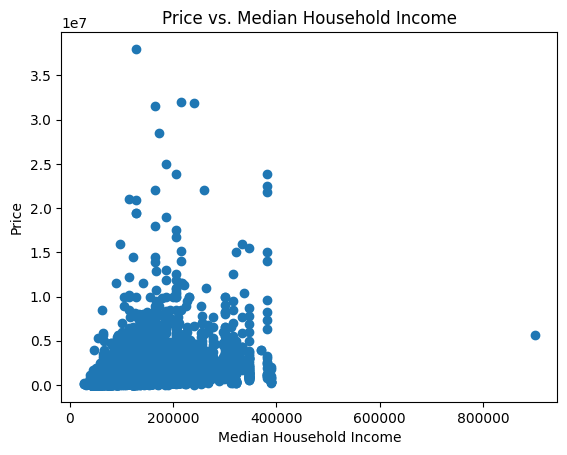

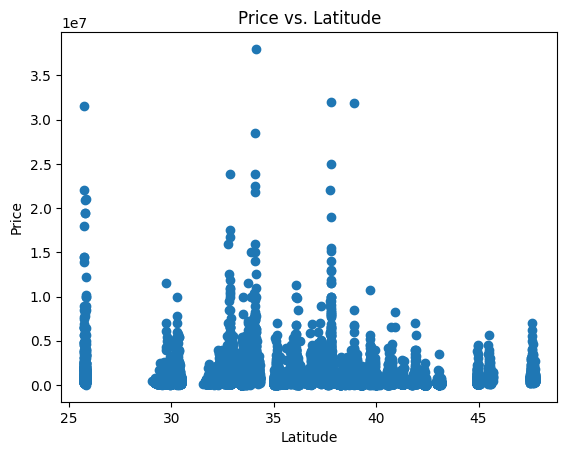

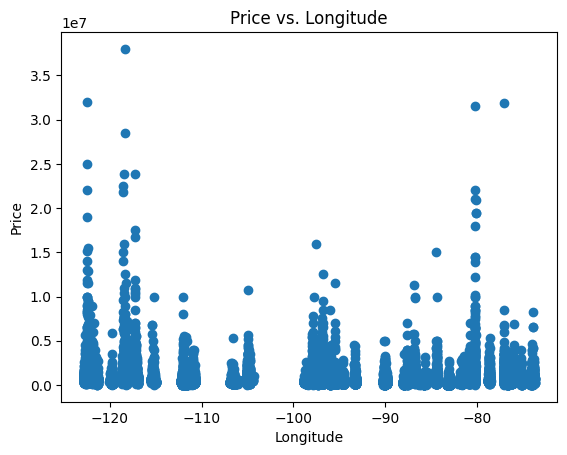

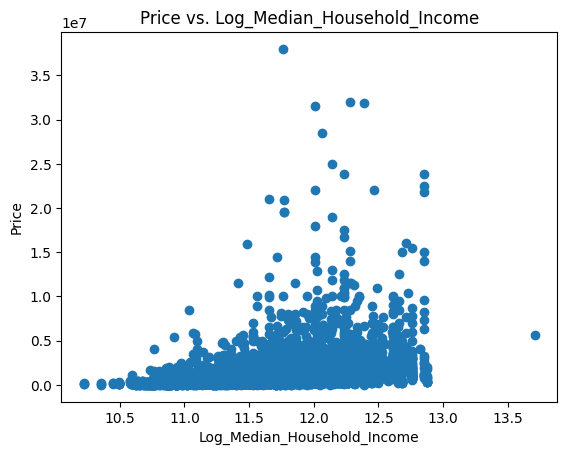

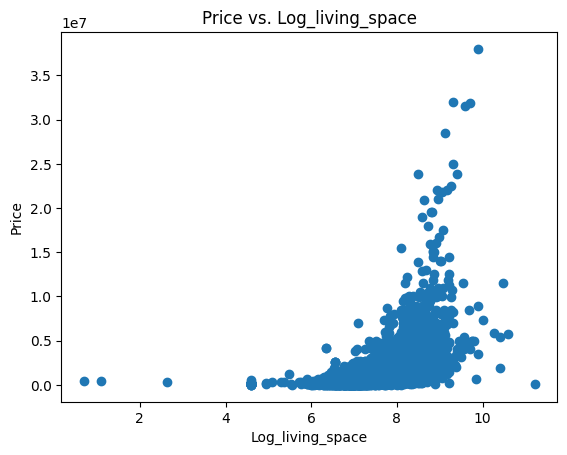

In [66]:
def scatter(data, Price, features):
  """
  Scatterplots for numeric features.
  Data: DataFrame
  Price: data['Price']
  Feature: Numeric Feature
  figzize: Size of the figure
  """
# Features of integer and float (10 columns)
features_int = ['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density',
       'Median Household Income', 'Latitude', 'Longitude', 'Log_Median_Household_Income', 'Log_living_space']

figsize = (10, 5)

  # Loop througt all features in the list
for feature in features_int:
    # Create a scatter pot for Price vs. the current feature
    plt.scatter(data[feature], data['Price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Price vs. {feature}')
    plt.show()

# Exclude "Price" from features_int as it's the target variable
features_to_plot = [f for f in features_int if f != 'Price']

# Call the function to create scatter plots for all features
scatter(data, data['Price'], features_to_plot)

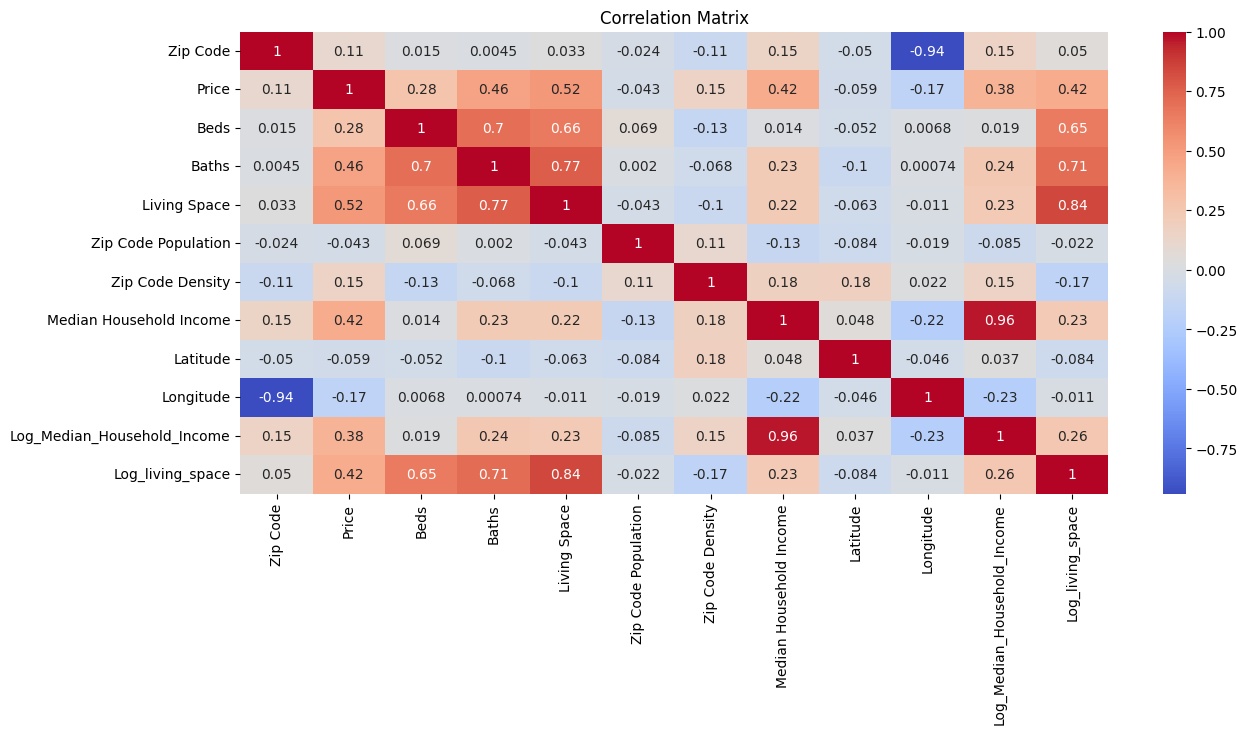

In [67]:
# Select only numerica features for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Create the figure and axes with the desired figsize
fig, ax = plt.subplots(figsize=(14, 6))

# calculate and plot the correlation matrix
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

## High Correlation

Zip Code and Longitude: -0.94. Keep Latitude and Longitude, but drop Zip Code.

Living Space and Log Living Space and Median Household Income and Log Median Household Imcome: Keep the Log because it has a more mormal distribution so we can drop the other ones.

In [68]:
data = data.drop  (['Zip Code', 'Living Space', 'Median Household Income'], axis=1)

In [69]:
data.head()

Price  Beds  Baths      City     State  Zip Code Population  \
0  3999000.0     2      3  New York  New York                29563   
1  3999000.0     2      3  New York  New York                29563   
2  1650000.0     1      1  New York  New York                29815   
3   760000.0     3      2  New York  New York                29815   
4  1100000.0     1      1  New York  New York                29815   

   Zip Code Density    County  Latitude  Longitude  \
0           20967.9  New York  40.72001  -74.00472   
1           20967.9  New York  40.72001  -74.00472   
2           23740.9  New York  40.73407  -74.00601   
3           23740.9  New York  40.73407  -74.00601   
4           23740.9  New York  40.73407  -74.00601   

   Log_Median_Household_Income  Log_living_space  
0                    12.821383          7.584265  
1                    12.821383          7.584265  
2                    12.428736          6.576470  
3                    12.428736          7.338238  
4                    12.428736          6.396930

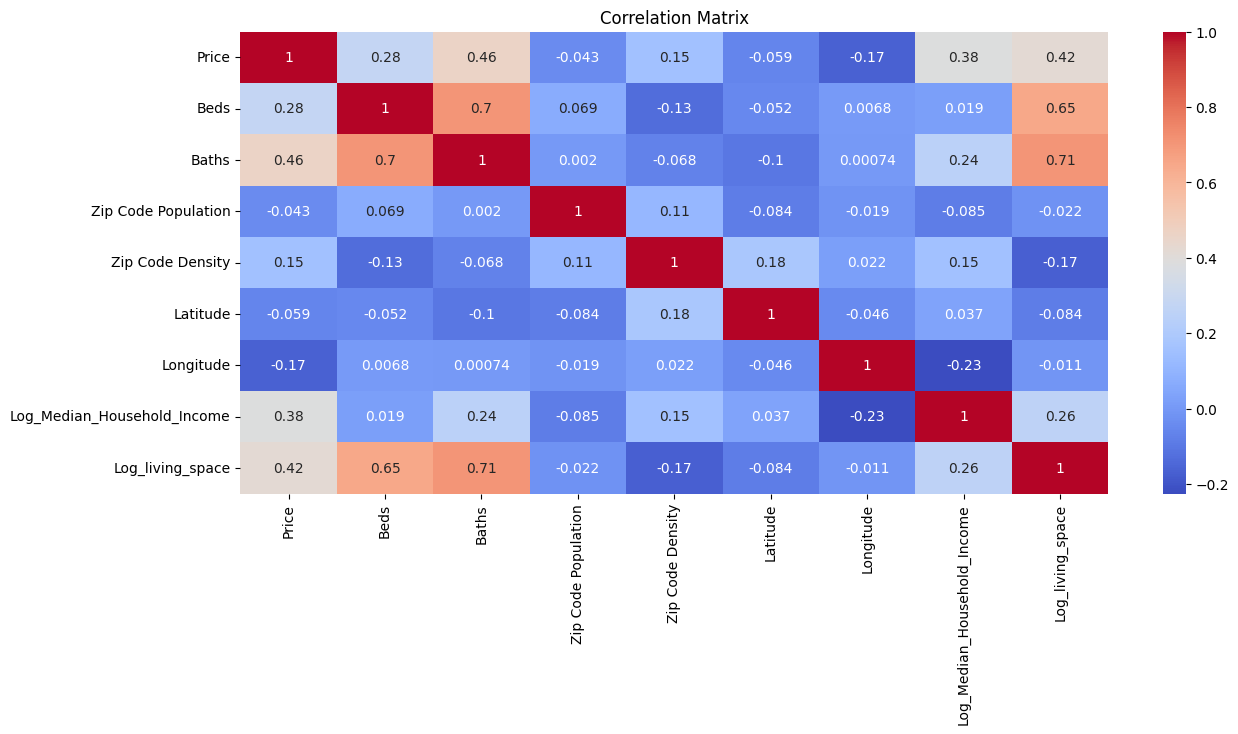

In [70]:
# Select only numerica features for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Create the figure and axes with the desired figsize
fig, ax = plt.subplots(figsize=(14, 6))

# calculate and plot the correlation matrix
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

##Feature Engineering: Beds_Baths_Total

I'm going to combine the number of bedrooms and bathrooms since they have a strong correlation.

In [71]:
data['Beds_Baths_Total'] = data['Beds'] * data['Baths']

In [72]:
data.drop(['Beds', 'Baths'], axis=1, inplace=True)

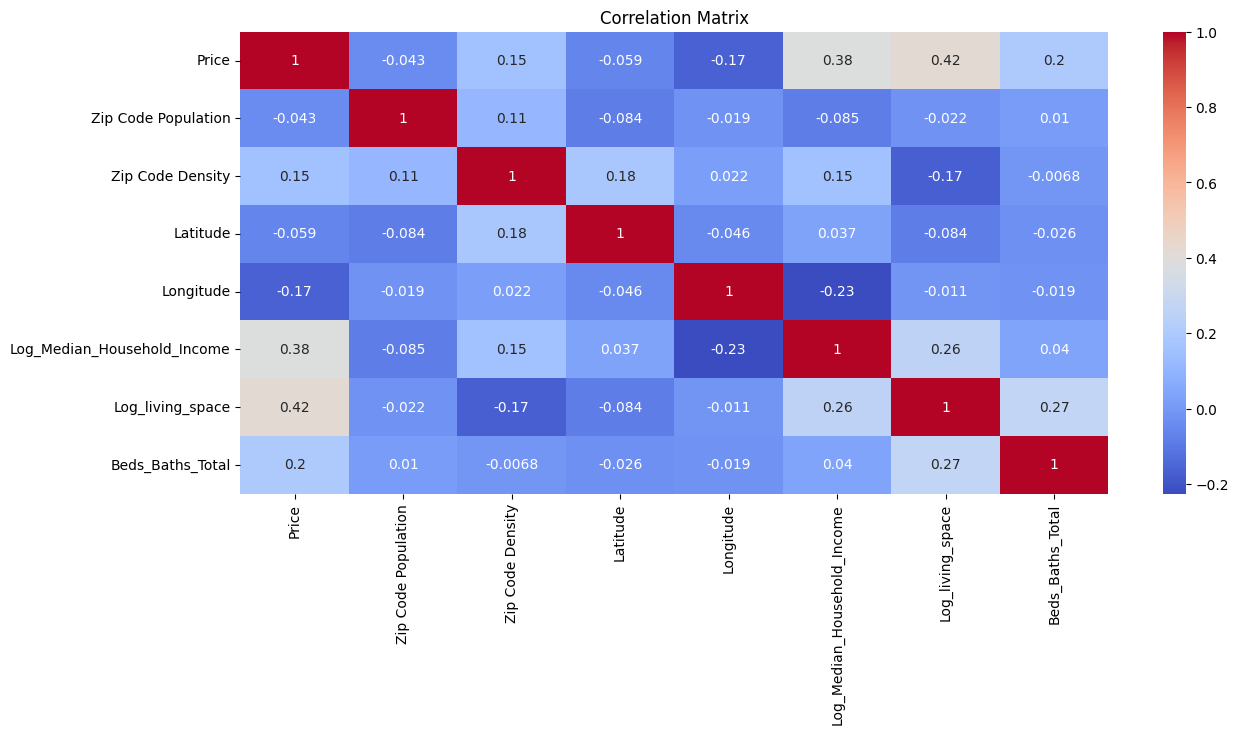

In [73]:
# Select only numerica features for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Create the figure and axes with the desired figsize
fig, ax = plt.subplots(figsize=(14, 6))

# calculate and plot the correlation matrix
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

##Heat Map: Correlation:

These features demonstrate minimal correlation, indicating near-independence and minimal bias. Therefore, we can confidently retain these essential features while removing redundant or highly correlated ones. The Heat Map looks good. No missing values, features and data prep. I think we're good to start modeling.

##Linear Regression

In [74]:
data.columns

Index(['Price', 'City', 'State', 'Zip Code Population', 'Zip Code Density',
       'County', 'Latitude', 'Longitude', 'Log_Median_Household_Income',
       'Log_living_space', 'Beds_Baths_Total'],
      dtype='object')

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

X = numeric_data[['Beds_Baths_Total', 'Zip Code Population',
       'Zip Code Density', 'Latitude', 'Longitude',
       'Log_Median_Household_Income', 'Log_living_space']]

y = numeric_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##Metrics:

MSE: Mean Squared Error: $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

MAE: Mean Absolute Error: $$MAE = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i | $$

MAPE: Mean Absolute Percentage Error: $$ MAPE = \frac{1}{n} \sum_{i=1}^{n} \left | \frac{y_i - \hat{y}_i}{y_i} \right | \times 100\% $$

R²: R-squared: $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}}  $$

Where:

$$ SS_{res} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

and

$$ SS_{tot} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

Note that ȳ represents the sample mean, while ŷᵢ represents a predicted or estimated value. R-squared is a measure of how well the independent variables in a model explain the variation in the dependent variable. It's a valuable tool for evaluating the "goodness of fit" of a regression model, and it ranges from 0 to 1. Conceptually, it can be helpful to think of R-squared as 1 - (residual variation / total variation).


In [76]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 775583856903.9482
Mean Absolute Error: 334820.66478387674
Mean Absolute Percentage Error: 1.091183749937444
R2 Score: 0.2920651599721207




Linear regression performed poorly due to the complexity and non-linearity of house prices.

Performance is quite poor, so I won't optimize it further. Instead, I'll try a different model.

##Decision Trees

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [78]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_dt)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred_dt)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_dt)}')
print(f'R2 Score: {r2_score(y_test, y_pred_dt)}')

Mean Squared Error: 661655936482.5138
Mean Absolute Error: 206910.6749614887
Mean Absolute Percentage Error: 0.6369379801058167
R2 Score: 0.3960559062986596


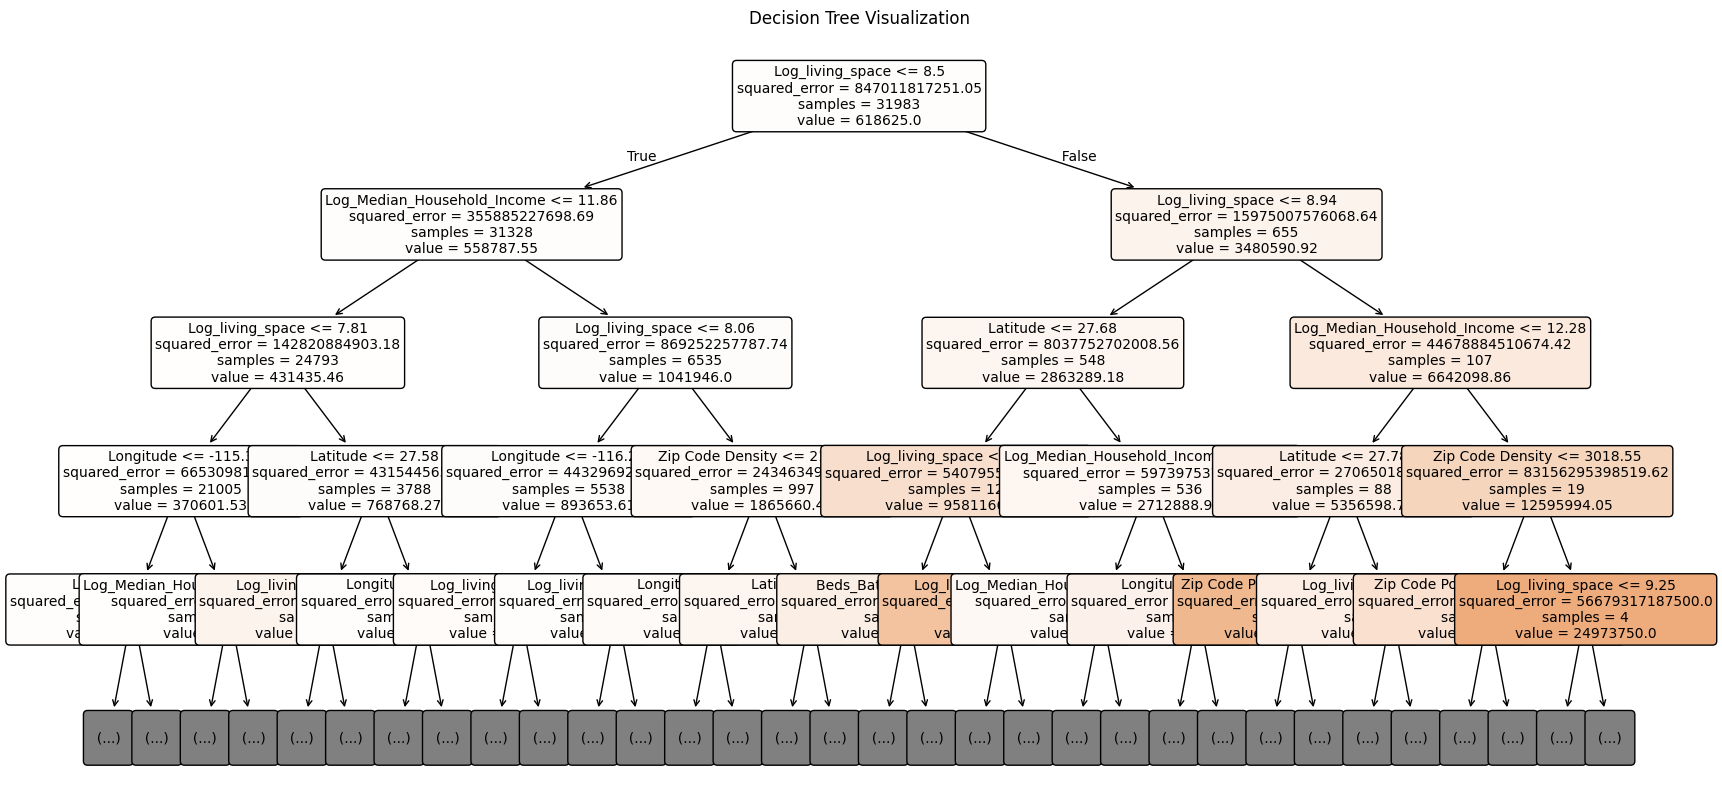

In [79]:
!pip install graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          max_depth = 4,
          filled=True,
          feature_names=X.columns,
          rounded=True,
          precision=2,
          fontsize = 10)
plt.title('Decision Tree Visualization')
plt.show()

##Decison Tree

Decision Tree improved performance but was still prone to underfitting.

##Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [81]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_rf)}')
print(f'R2 Score: {r2_score(y_test, y_pred_rf)}')

Mean Squared Error: 272152870244.80682
Mean Absolute Error: 156169.0417502145
Mean Absolute Percentage Error: 0.5291379804058509
R2 Score: 0.7515852129401062


In [82]:
# Get feature importances
importances = rf_model.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# print the top N features top = 6
N = 6
print(f'Top {N} Features:')
print(feature_importances.head(N))

Top 6 Features:
                       Feature  Importance
6             Log_living_space    0.445838
5  Log_Median_Household_Income    0.192772
3                     Latitude    0.115223
4                    Longitude    0.103368
2             Zip Code Density    0.081415
0             Beds_Baths_Total    0.034957


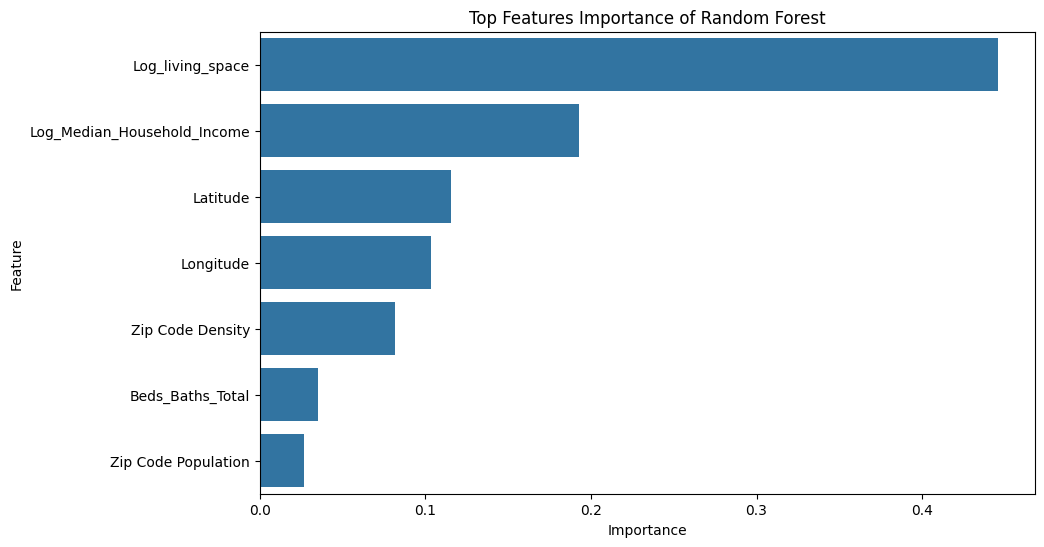

In [83]:
# Visualize random forest features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Top Features Importance of Random Forest')
plt.show()

##XGBoost

In [90]:
!pip install xgboost
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100,
                         learning_rate=0.05,
                         max_depth=6,
                         ramdom_state=42
                         )

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_xgb)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred_xgb)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_xgb)}')
print(f'R2 Score: {r2_score(y_test, y_pred_xgb)}')

Mean Squared Error: 309721615272.7698
Mean Absolute Error: 174240.06066118996
Mean Absolute Percentage Error: 0.539449970349469
R2 Score: 0.7172933394506442


Although XGBoost was tuned with hyperparameters, it did not outperform Random Forest.

## Insights:

1. Log-transformed Living Space emerged as the strongest predictor of house prices.

2. Log median household income does have a role.

By analyzing 40,000+ house listings, we identified key factors influencing home prices. The strongest predictors were living space, median income, and geographic location. This information can help real estate businesses make better pricing decisions.